In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
df['Dependents']=df['Dependents'].replace('3+','3')

In [10]:

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())





In [11]:
df['Gender']=df['Gender'].fillna('Male')
df['Self_Employed']=df['Self_Employed'].fillna('No')
df['Dependents']=df['Dependents'].fillna('0')

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### EDA

<AxesSubplot:xlabel='Education', ylabel='count'>

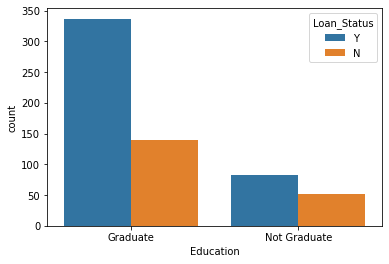

In [14]:
sns.countplot(x='Education',hue='Loan_Status',data=df)


<AxesSubplot:xlabel='Gender', ylabel='count'>

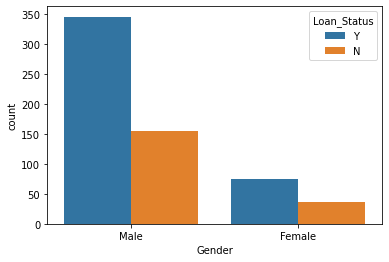

In [15]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)


<AxesSubplot:xlabel='Married', ylabel='count'>

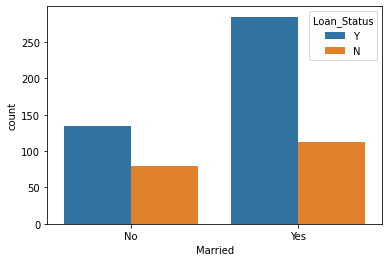

In [16]:
sns.countplot(x='Married',hue='Loan_Status',data=df)


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

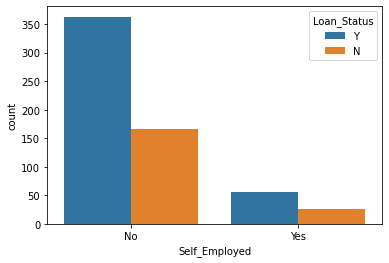

In [17]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)


In [18]:
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

In [19]:
df.replace({'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},
'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0}},inplace=True)

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [21]:
#splite the data into dependent and independent
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [22]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [25]:
y=df['Loan_Status']

In [26]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [28]:
#split the data into train and test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((488, 11), (123, 11), (488,), (123,))

In [30]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')


In [31]:
#train the suport vector model
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [49]:
y_pred=svc.predict(x_train)

In [50]:
from sklearn.metrics import accuracy_score,classification_report

In [51]:
#evaculation of train model

In [52]:
accuracy=accuracy_score(y_train,y_pred)

In [53]:
accuracy

0.7807377049180327

In [ ]:
#evaculation of test model

In [54]:
y_pred=svc.predict(x_test)

In [55]:
accuracy=accuracy_score(y_test,y_pred)

In [56]:
accuracy

0.7967479674796748

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63        40
           1       0.80      0.93      0.86        83

    accuracy                           0.80       123
   macro avg       0.79      0.73      0.74       123
weighted avg       0.79      0.80      0.78       123



In [57]:
import pickle
 
pickle.dump(svc, open('model_save', 'wb'))
 
model = pickle.load(open('model_save', 'rb'))
 
svc.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)